<a href="https://colab.research.google.com/github/prat8897/R_companion/blob/main/R_companion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.3                         
year           2020                        
month          10                          
day            10                          
svn rev        79318                       
language       R                           
version.string R version 4.0.3 (2020-10-10)
nickname       Bunny-Wunnies Freak Out     

#Preface

This document contains hands-on examples using R code to illustrate the methods discussed in the Bayesian networks course. Thre is usually one chapter here per lecture, but not all lectures have code examples.

This course does not cover the R programming language itself, but we try to be gentle and explain a few things as we go along. There are many excellent resources online for learning R.

#Naive and Optimal Bayesian Prediction

This vignette contains R code for performing prediction with Naive Bayes and logistic regression classifiers for an example from the lecture.

Learning objectives:
* Become acquainted with the R platform
* Be able to perform simple classification tasks on discrete data
* Understand the difference between logistic regression and Naive Bayes

Please read the following vignette and make sure that you can run the code on your own computer. You will first need to have R or RStudio installed.

##Installing the R package for this course

We first need to install the Bayesian Networks R package from github. If you have not done this yet, uncomment the first two lines in the code block below (by removing the hash mark) and then run them. This should first install the “devtools” package, and then install the “bayesianNetworks” package from github.

During the course, this package may change and be upgraded, so it may be a good idea to install it regularly.

In [2]:
install.packages(c("remotes","pROC","naivebayes"))
remotes::install_github("jtextor/bayesianNetworks")

library( bayesianNetworks )

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’





✔  checking for file ‘/tmp/RtmpJ1QJn3/remotes646efb2749/jtextor-bayesianNetworks-bd3d8e0/DESCRIPTION’
─  preparing ‘bayesianNetworks’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘bayesianNetworks_0.0.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Note: if installing the “bayesianNetworks” package above does not work for you, perhaps because your version of R is too old to install the “remotes” package that this also requires, then instead you can also use the line below to directly include the functions defined in that package.

```
# source("https://raw.githubusercontent.com/jtextor/bayesianNetworks/master/R/functions.R")
```

##Generating some artificial data to work with

Now we simulate some data from the “Sprinkler” example in the lecture notes to train a classifier on. Separately we will also generate a test set to evaluate our classifier. Here I also seed the random number generator so that you hopefully get exactly the same output as I do.

In [3]:
set.seed(123)
training.data <- simulate_sprinkler( 500 )
test.data <- simulate_sprinkler( 1000 )

Let us see how the training data looks like. The below line generates a table similar to the ones we saw in the lecture by counting the amount of datapoints for each category.

In [4]:
print( ftable(training.data, row.vars=1:4) )

WetGrass Rain  Sprinkler Cloudy     
FALSE    FALSE FALSE     FALSE   102
                         TRUE     43
               TRUE      FALSE    13
                         TRUE      0
         TRUE  FALSE     FALSE     3
                         TRUE     14
               TRUE      FALSE     1
                         TRUE      0
TRUE     FALSE FALSE     FALSE     1
                         TRUE      0
               TRUE      FALSE    87
                         TRUE      7
         TRUE  FALSE     FALSE    16
                         TRUE    170
               TRUE      FALSE    23
                         TRUE     20


##Using logistic regression to predict whether the grass is wet

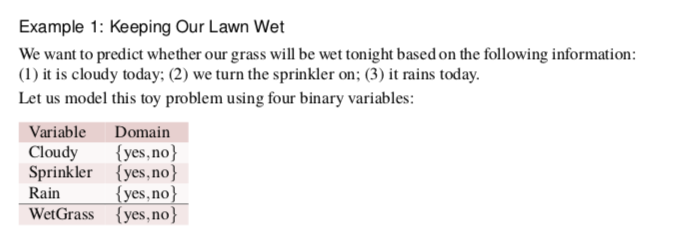

Prediction in R is always done in two steps. First, we fit a prediction model to a training dataset. For example, the below line fits a logistic regression model. Here `glm` stands for a generalized linear model, and we are using the binomial linkage function.

In [5]:
m <- glm( WetGrass ~ Cloudy + Rain + Sprinkler, data=training.data, family="binomial" )

We can look at this model to get some information about the fit, such as the values of the coefficients.

In [6]:
summary(m)


Call:
glm(formula = WetGrass ~ Cloudy + Rain + Sprinkler, family = "binomial", 
    data = training.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0067  -0.1380   0.4066   0.4066   3.0523  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -4.6488     0.7675  -6.057 1.39e-09 ***
CloudyTRUE      0.9242     0.5614   1.646   0.0997 .  
RainTRUE        6.1758     0.7759   7.960 1.73e-15 ***
SprinklerTRUE   6.4995     0.8129   7.995 1.29e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 648.68  on 499  degrees of freedom
Residual deviance: 223.23  on 496  degrees of freedom
AIC: 231.23

Number of Fisher Scoring iterations: 7


Let us now check how well this prediction model represents the training data. For this we need to use the R function `predict`, which will give us the probability that the grass is wet for each observation in a dataset.

In [7]:
y <- predict( m, newdata=training.data, type="response" )

We now determine the quality of this fit using the Area Under the Curve metric. This requires using the
`pROC` package, which provides methods for computing the AUC . . .

In [8]:
library( pROC )

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [9]:
auc( training.data$WetGrass, y )

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



Area under the curve: 0.9326

... and plotting ROC curves.

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



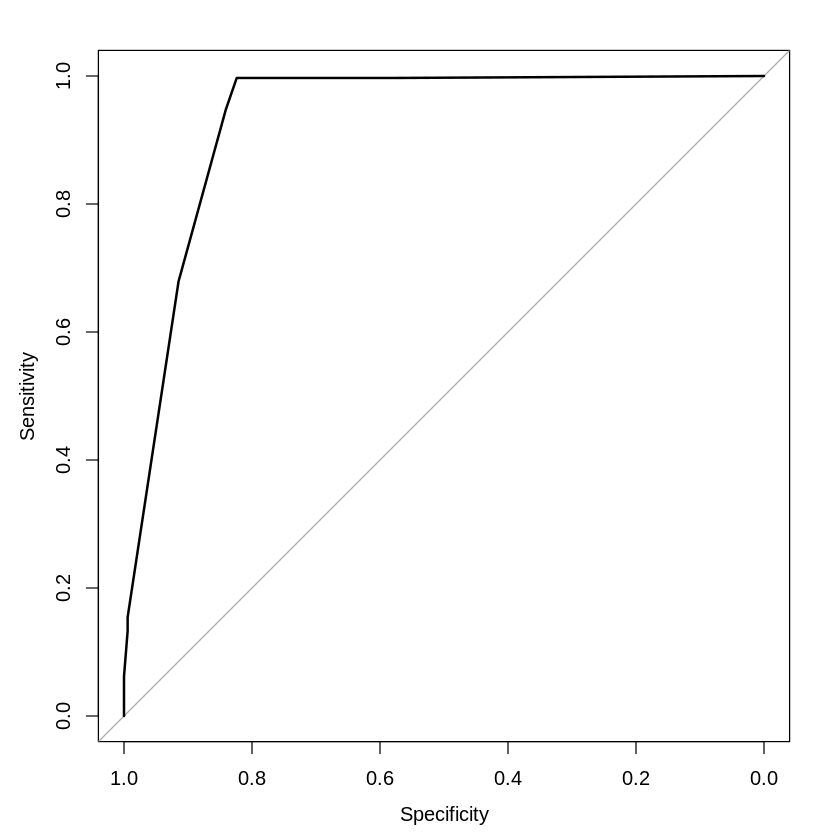

In [10]:
plot( roc(training.data$WetGrass,y) )

This ROC curve does not look too bad. But remember that this is the data we fitted the classifier on, so this is not actually a prediction. We should instead look at the test data.

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



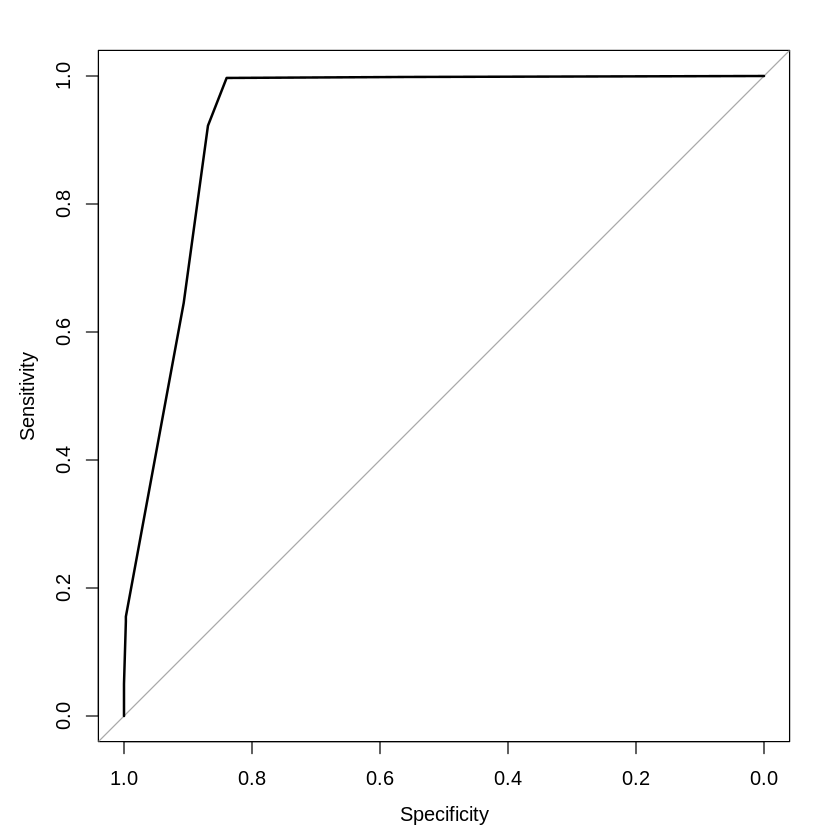

In [11]:
y <- predict( m, newdata=test.data, type="response" )
plot( roc(test.data$WetGrass,y) )

In [12]:
auc( test.data$WetGrass, y )

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



Area under the curve: 0.9327

This really isn’t bad! Our logistic regression classifier seems to generalize pretty well.

##Using Naive Bayes to predict whether the grass is wet

Now we will use Naive Bayes instead of logistic regression to solve the same task. For this we will use yet another package, which provides an implementation of Naive Bayes that uses the standard R interface for fitting prediction models. This implementation can be found in the aptly named `naivebayes` package.

In [13]:
library(naivebayes)

naivebayes 0.9.7 loaded



The `naivebayes` package uses the standard R interface for model fitting, just like in the logistic regression example.

In [14]:
m <- naive_bayes( WetGrass ~ Cloudy + Rain + Sprinkler, data=training.data )

We can look at the estimated probability tables simply by printing the fitted object.

In [15]:
m


================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = WetGrass ~ Cloudy + Rain + Sprinkler, 
    data = training.data)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

FALSE  TRUE 
0.352 0.648 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: Cloudy (Bernoulli) 
--------------------------------------------------------------------------------- 
       
Cloudy      FALSE      TRUE
  FALSE 0.6761364 0.3919753
  TRUE  0.3238636 0.6080247

--------------------------------------------------------------------------------- 
 ::: Rain (Bernoulli) 
------------------------------------------------------------------------------

Now we proceed to generate predictions. This time, we go straight to the test set.

In [16]:
y <- predict( m, newdata=test.data, type="prob" )

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


Unlike the logistic regression, this will give us a matrix of probabilities. In the first column, we find the probability that the grass is not wet, and in the second column, we find the probability that the grass is wet:

In [17]:
head(y)

FALSE,TRUE
0.82063584,0.1793642
0.82063584,0.1793642
0.06259113,0.9374089
0.06259113,0.9374089
0.82063584,0.1793642
0.06259113,0.9374089


To continue, we just discard the first column.

In [18]:
y <- y[,2]

From here on, we can determine our AUC values in exactly the same way as for the logistic regression above.

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



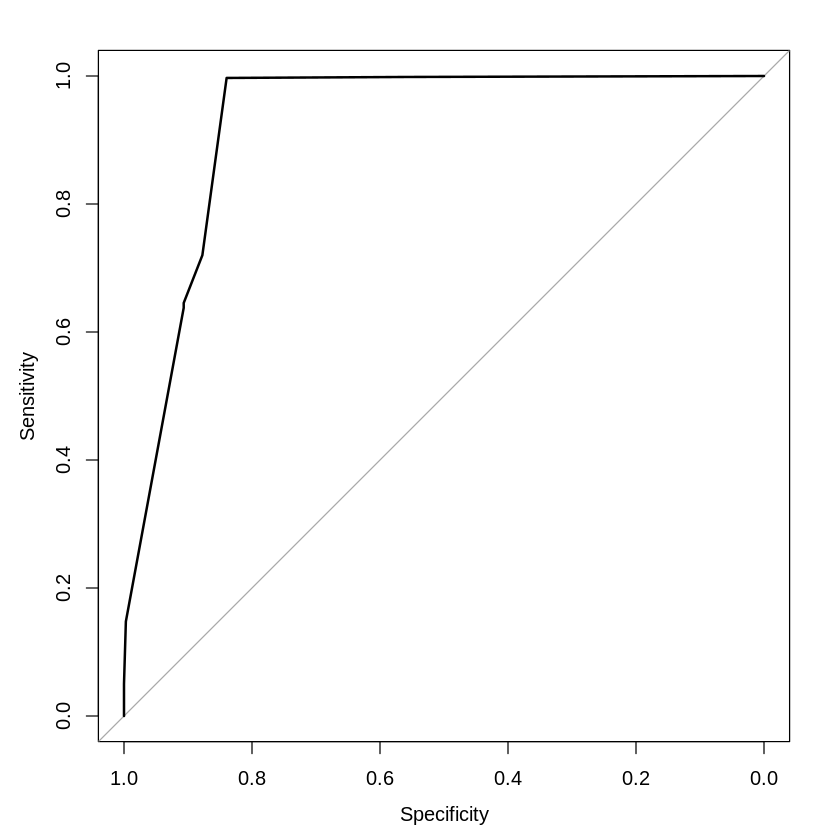

In [19]:
plot(roc(test.data$WetGrass,y) )

In [20]:
auc( test.data$WetGrass, y )

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



Area under the curve: 0.9268

This is just a tiny little bit worse than the logistic regression; this difference is well within the uncertainty range, so we cannot actually say that it’s different at all.

##Optimal Bayes

The course R package contains a very simple implementation of the optimal Bayes classifier introduced in the lecture. This is not a very well tested implementation, and it can likely be broken; please let us know if you encounter any problems. For now, we’ll use it only on the same sprinkler data as before.

The interface of the optimal Bayes is the same as for the naive Bayes classifier above.

In [21]:
m <- optimal_bayes( WetGrass ~ Cloudy + Rain + Sprinkler, data=training.data )

This will just generate one large probability table.

In [22]:
m

$evidence
[1] "Cloudy"    "Rain"      "Sprinkler"

$hypothesis
[1] "WetGrass"

$classes
[1]  TRUE FALSE

$probability_table
   WetGrass Cloudy  Rain Sprinkler  Freq
1     FALSE  FALSE FALSE     FALSE 0.204
2      TRUE  FALSE FALSE     FALSE 0.002
3     FALSE   TRUE FALSE     FALSE 0.086
4      TRUE   TRUE FALSE     FALSE 0.000
5     FALSE  FALSE  TRUE     FALSE 0.006
6      TRUE  FALSE  TRUE     FALSE 0.032
7     FALSE   TRUE  TRUE     FALSE 0.028
8      TRUE   TRUE  TRUE     FALSE 0.340
9     FALSE  FALSE FALSE      TRUE 0.026
10     TRUE  FALSE FALSE      TRUE 0.174
11    FALSE   TRUE FALSE      TRUE 0.000
12     TRUE   TRUE FALSE      TRUE 0.014
13    FALSE  FALSE  TRUE      TRUE 0.002
14     TRUE  FALSE  TRUE      TRUE 0.046
15    FALSE   TRUE  TRUE      TRUE 0.000
16     TRUE   TRUE  TRUE      TRUE 0.040

attr(,"class")
[1] "optimal_bayes"

In [23]:
y <- predict( m, newdata=test.data )

Like for naive Bayes, this will give us a matrix of probabilities. In the first column, we find the probability
that the grass is not wet, and in the second column, we find the probability that the grass is wet:

In [24]:
head(y)

FALSE,TRUE
0.99029126,0.009708738
0.99029126,0.009708738
0.07608696,0.923913043
0.07608696,0.923913043
0.99029126,0.009708738
0.07608696,0.923913043


To continue, we just discard the first column.

In [25]:
y <- y[,2]

From here on, we can determine our AUC values in exactly the same way as above.

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



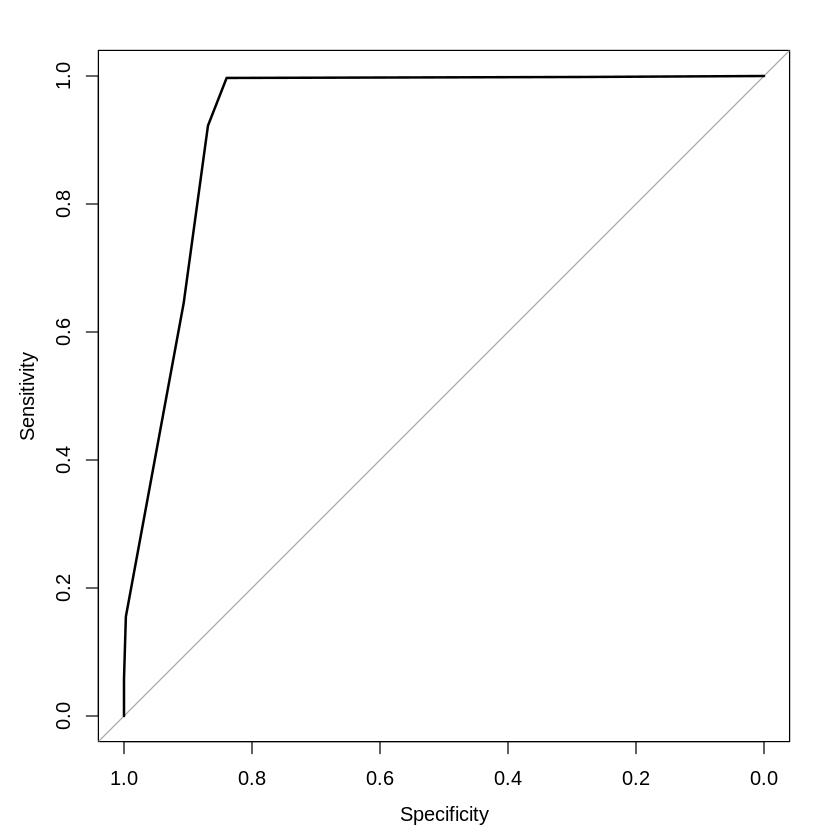

In [26]:
plot( roc(test.data$WetGrass,y) )

In [27]:
auc( test.data$WetGrass, y )

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



Area under the curve: 0.9323

##Questions

Now it’s your turn! Please modify and perhaps extend the code above to answer the following question:
* What happens to the performance of logistic regression and naive Bayes if you change the size of the test set?

##Further reading

If you want to learn about a theoretical perspective on the difference between naive Bayes and logistic regression classifiers, the paper by Ng and Jordan (2001) is a very important classic in the field.

# Bayesian Network Structure and Prediction

We will now move on to do predictions with a “real” Bayesian network, and compare these predictions to those that we get from Naive Bayes and Logistic Regression.

Learning objectives:
* Be able to compare the outputs of different probabilistic classifiers
* Be able to perform prediction using Bayesian networks


You will need to have the R packages `pROC`, `naivebayes`, and `bayesianNetworks` installed for this chapter; please see the previous chapter for instructions.

The `bayesianNetworks` package may change and/or upgraded throughout this course, so it may be a good idea to re-install it regularly.

In [ ]:
#library( bayesianNetworks )

##Installing the R package `bnlearn`

This week’s exercise makes use of a new package, which is called `bnlearn`. This is a very powerful R package for working with Bayesian networks (Scutari, 2010).

In [28]:
install.packages("bnlearn")
library( bnlearn )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##Generating some artificial data to work with

Like last week, let us first generate some data from the `Sprinkler` example. We now deliberately create a very large training set. We do not want to do prediction on separate test data this time so we generate only the training data.


In [29]:
set.seed(123)
training.data <- simulate_sprinkler( 10000 )

Next we fill fit two classifiers on it: an “optimal bayes” classifier (so just a probability table) and a logistic regression.

In [30]:
 m.lr <- glm( WetGrass ~ Cloudy + Rain + Sprinkler, data=training.data, family="binomial" )
 m.optbayes <- optimal_bayes( WetGrass ~ Cloudy + Rain + Sprinkler, data=training.data )

##Comparing optimal Bayes to logistic regression

We know that logistic regression performs an approximation to the optimal Bayes classifier. We now wonder how much this approximation actually differs from the “real” probability tables. To answer this question, we will need to generate probabilities for the grass being wet for each possible combination of the other values.


We first create a matrix containing all combinations of the other values:

In [32]:
tbl <- expand.grid( Cloudy=c(FALSE,TRUE), Rain=c(FALSE,TRUE), Sprinkler=c(FALSE,TRUE))
tbl

Cloudy,Rain,Sprinkler
<lgl>,<lgl>,<lgl>
FALSE,FALSE,FALSE
TRUE,FALSE,FALSE
FALSE,TRUE,FALSE
TRUE,TRUE,FALSE
FALSE,FALSE,TRUE
TRUE,FALSE,TRUE
FALSE,TRUE,TRUE
TRUE,TRUE,TRUE


Now, for each of these combinations, we predict the conditional probability that the grass is wet from the logistic regression.

In [34]:
p.lr <- predict( m.lr, newdata=tbl, type="response" )

And we also predict the same probabilities from the optimal Bayes.

In [35]:
p.optbayes <- predict( m.optbayes, newdata=tbl )[,2]

Let us first compare these results side by side.

In [36]:
cbind( p.lr, p.optbayes )

,p.lr,p.optbayes
1,0.01144195,0.007831620
2,0.01268746,0.007726269
3,0.88607417,0.889534884
4,0.89621333,0.899003874
5,0.90590837,0.911779704
6,0.91445276,0.918604651
7,0.99984546,0.987878788
8,0.99986080,0.984168865


From this, it seems that the probabilities match up fairly well. Let us also plot them against each other:

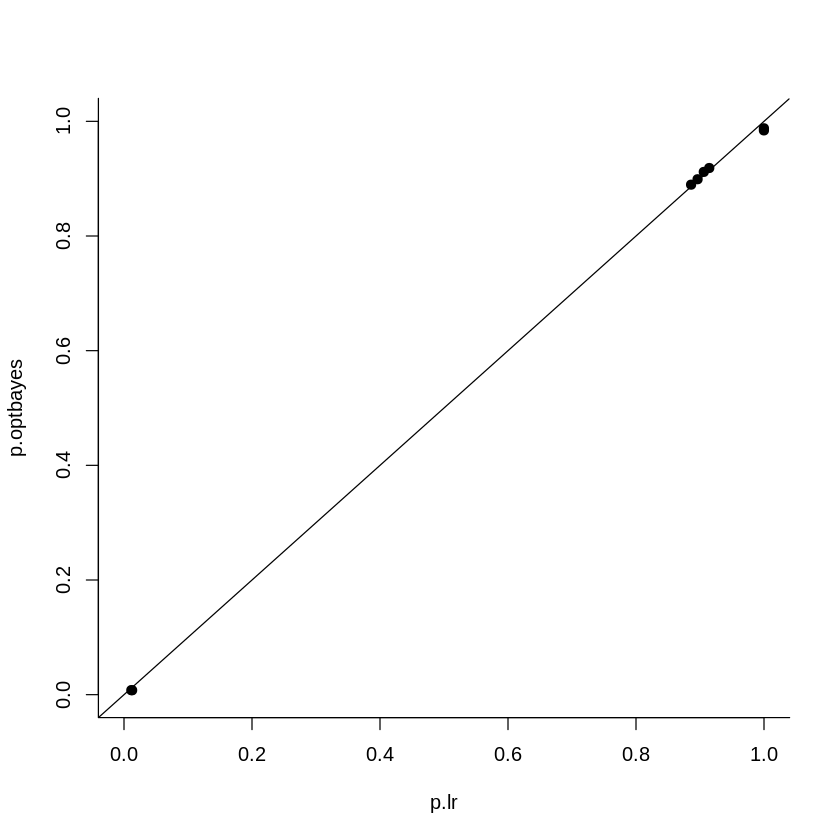

In [37]:
plot( p.lr, p.optbayes,
    bty="l", pch=19, xlim=c(0,1), ylim=c(0,1) )
# Add diagonal line
abline( a=0, b=1 )

This plot is not very useful because many probabilities are either close to 0 or close to 1. Such “extreme” probabilities cannot be compared very well. A remedy is the so-called “logit transformation”, which converts probabilities to log odds. We choose to use a 10-base logarithm for this transformation here:

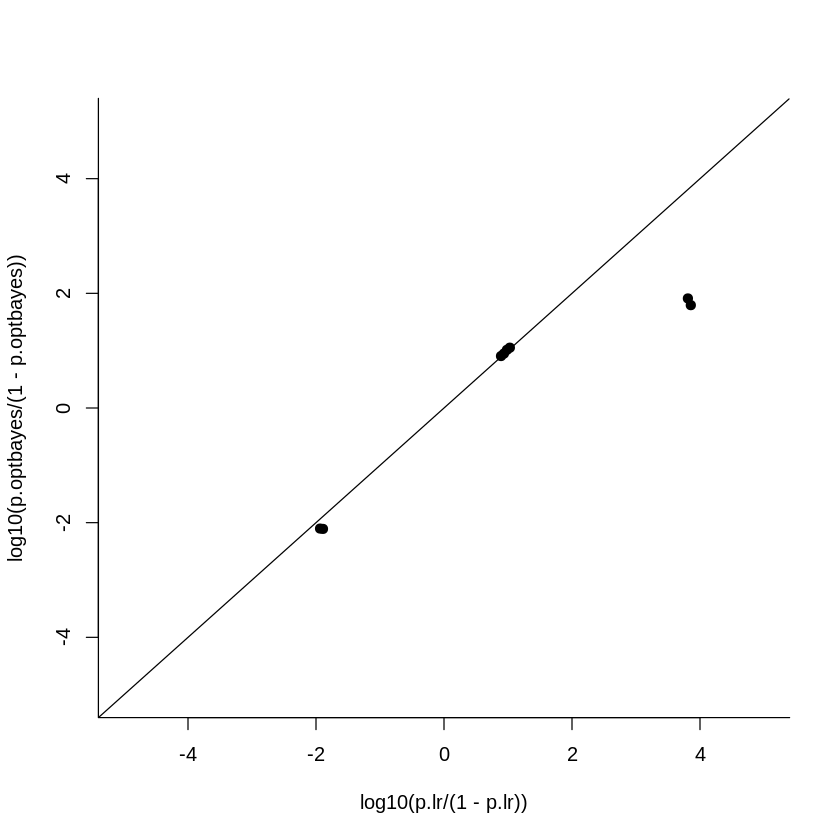

In [38]:
plot( log10(p.lr/(1-p.lr)), log10(p.optbayes/(1-p.optbayes)),
    bty="l", pch=19, xlim=c(-5,5), ylim=c(-5,5) )
abline( a=0, b=1 )

This plot visualizes very well that the most significant deviation from the optimal Bayes occurs in those cases where it is very likely that the grass is wet. For example, if all three variables are set to TRUE, then the probability that the grass is dry is still around 1.6% according to the optimal Bayes classifier, but far below 0.1% for logistic regression. In other words, logistic regression underestimates the probability of dry grass when it rains, the sprinkler is on, and it is cloudy by more than 10-fold!

##Comparing naive Bayes to logistic regression

Now, let’s see how the `bnlearn` package can be used to specify and use Bayesian networks for this kind of prediction problems. First, we specify a Bayesian network model that has simply the Naive Bayes structure. There are many different ways to specify such structures in the `bnlearn` package. A convenient way is the function `model2network`. Here we specify the parents of each node after the bar symbol.


In [39]:
net <- model2network("[WetGrass][Sprinkler|WetGrass][Rain|WetGrass][Cloudy|WetGrass]")

Note that in the Naive Bayes structure, each node has at most one parent. If there were multiple parents, we would separate them by a colon, e.g. `[WetGrass|Rain:Sprinker]`.

Unfortunately, the `bnlearn` package cannot directly work with Boolean data. Instead, it expects the data as a so-called `factor`, which is the way that discrete variables are represented in R. So we first convert our training data to this format.

In [40]:
 training.data.for.bnlearn <- as.data.frame(lapply(training.data,factor))
 tbl.for.bnlearn <- as.data.frame(lapply(tbl,factor))

Having done this, we can now “fit” the Bayesian network to the data. This means that we estimate the probabilities for each of the probability tables from the given data.

In [41]:
m.bn <- bn.fit( net, as.data.frame(lapply(training.data,factor)) )

This creates local probability tables for each node in the network.

As we have heard in the lecture, inference in Bayesian networks is an NP-hard problem, so quite cumbersome algorithms need to be used to perform it. The `bnlearn` package actually uses a stochastic algorithm called likelihood-weighted sampling. We can invoke the algorithm and get predicted probabilities using the somewhat cryptic syntax below. The `n=10000` argument specifies the number of iterations used in the stochastic algorithm.


In [42]:
pr.bn <- predict( m.bn, node="WetGrass",
    data=tbl.for.bnlearn, method="bayes-lw", prob=TRUE, n=10000 )
p.bn <- attr( pr.bn , 'prob' )[2,]

Note that every time you run the prediction, you will get slightly different results. But the general picture should resemble the one below.

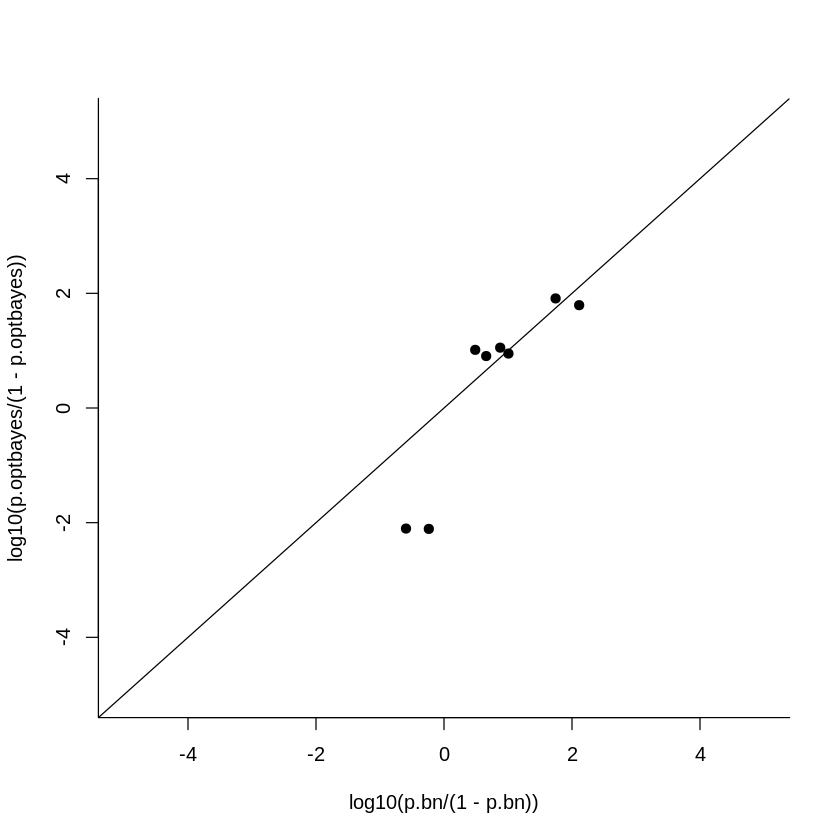

In [43]:
plot( log10(p.bn/(1-p.bn)), log10(p.optbayes/(1-p.optbayes)),
    bty="l", pch=19, xlim=c(-5,5), ylim=c(-5,5) )
# Add diagonal line
abline( a=0, b=1 )

What we can see here is that, rather interestingly, the Naive Bayes algorithm makes most of its approximation error in the less probable outcomes, in contrast to Logistic regression where it was the most probable outcomes that were the most off.

We can also appreciate these results when we plot the results of Naive Bayes and logistic regression directly against each other:

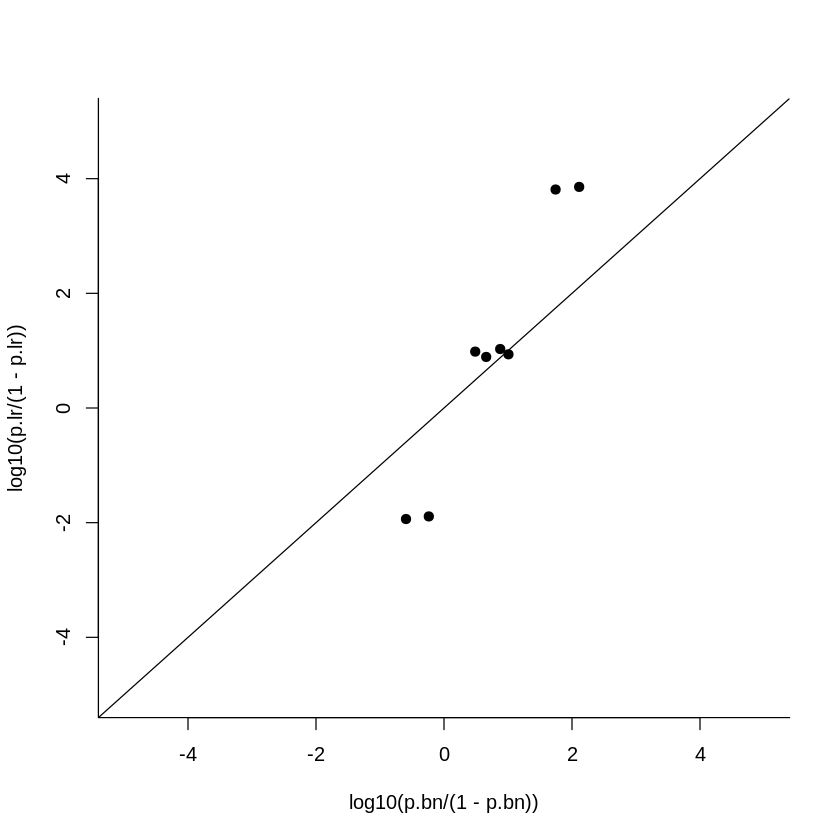

In [44]:
plot( log10(p.bn/(1-p.bn)), log10(p.lr/(1-p.lr)),
    bty="l", pch=19, xlim=c(-5,5), ylim=c(-5,5) )
# Add diagonal line
abline( a=0, b=1 )

##Using real Bayesian networks

Now it’s your turn! Try to modify the code to run a prediction using an actual Bayesian Network that does not have the Naive Bayes structure. Can you find a network structure that does well at approximating the Optimal Bayes probabilities?

In particular, please test these structures.

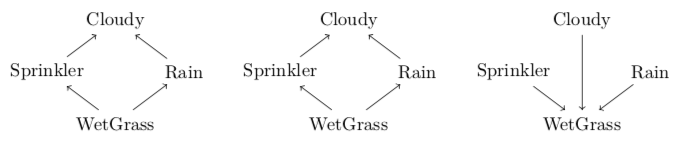